In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm

%matplotlib inline

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

sns.set_style("whitegrid")
sns.set_context("poster")

In [0]:
def make_simple_plot():
  fig, axes = plt.subplots(figsize = (12, 5), nrows = 1, ncols = 2)
  axes[0].set_ylabel("$y$")
  axes[0].set_xlabel("$x$")
  axes[1].set_xlabel("$x$")
  axes[1].set_yticklabels([])
  axes[0].set_ylim([-2, 2])
  axes[1].set_ylim([-2, 2])
  plt.tight_layout()
  return axes

def make_plot():
  fig, axes = plt.subplots(figsize = (20, 8), nrows = 1, ncols = 2)
  axes[0].set_ylabel("$p_R$")
  axes[0].set_xlabel("$x$")
  axes[1].set_xlabel("$x$")
  axes[1].set_yticklabels([])
  axes[0].set_ylim([0, 1])
  axes[1].set_ylim([0, 1])
  axes[1].set_xlim([0, 1])
  axes[1].set_xlim([0, 1])
  plt.tight_layout()
  return axes

In [4]:
from google.colab import files
upload = files.upload()

Saving religion.csv to religion.csv


In [0]:
df = pd.read_csv("religion.csv")

In [4]:
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


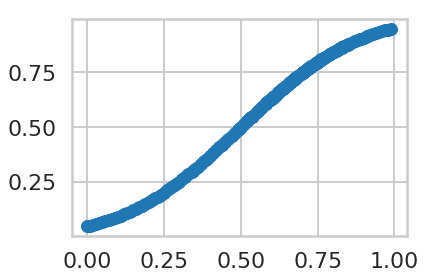

In [5]:
x = df.rfrac.values
f = df.promney.values

plt.plot(x, f, 'o')

In [0]:
indexes = np.sort(np.random.choice(x.shape[0], size = 30, replace = False))

In [0]:
samplex = x[indexes]
samplef = f[indexes]

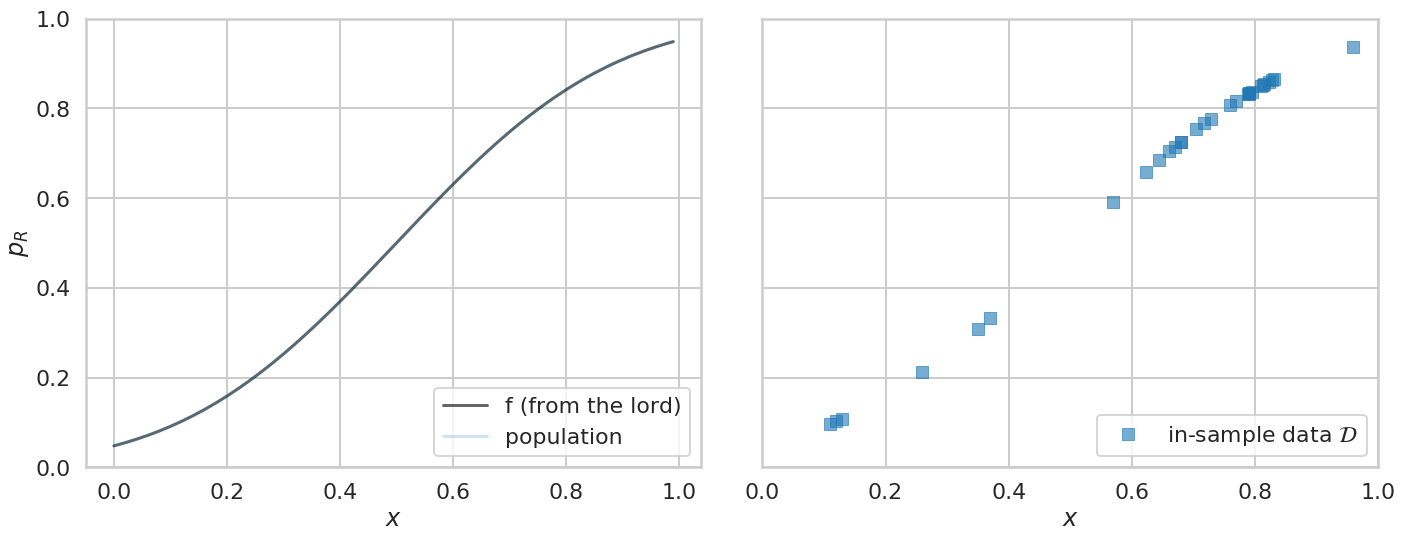

In [8]:
axes = make_plot()

axes[0].plot(x, f, 'k-', alpha = 0.6, label = "f (from the lord)")
axes[0].plot(x, f, alpha = 0.2, label = "population")
axes[1].plot(samplex, samplef, 's', alpha = 0.6, label = "in-sample data $\cal{D}$")
axes[0].legend(loc = 4)
axes[1].legend(loc = 4)

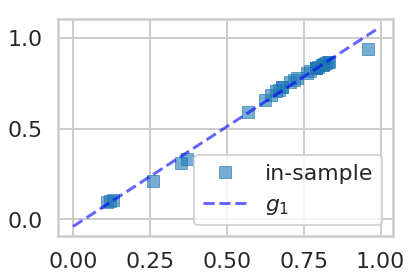

In [9]:
g1 = np.poly1d(np.polyfit(x[indexes], f[indexes], 1))
plt.plot(x[indexes], f[indexes], 's', alpha = 0.6, label = "in-sample")
plt.plot(x, g1(x), 'b--', alpha = 0.6, label = "$g_1$")
plt.legend(loc = 4)

In [10]:
g20 = np.poly1d(np.polyfit(x[indexes], f[indexes], 20))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


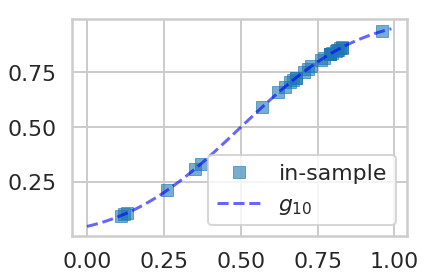

In [11]:
plt.plot(x[indexes], f[indexes], 's', alpha = 0.6, label = "in-sample")
plt.plot(x, g20(x), 'b--', alpha = 0.6, label = "$g_{10}$")
plt.legend(loc = 4)

Text(0.5,1,'Bias')

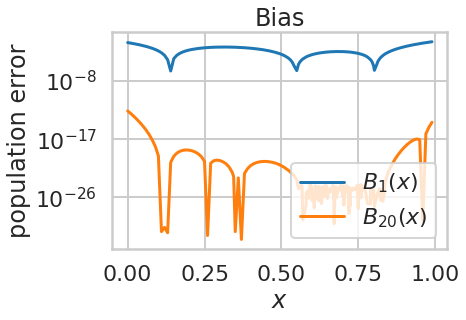

In [12]:
plt.plot(x, (g1(x) - f)**2, lw = 3, label = "$B_1(x)$")
plt.plot(x, (g20(x) - f)**2, lw = 3, label = "$B_{20}(x)$")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc = 4)
plt.title("Bias")

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 1)

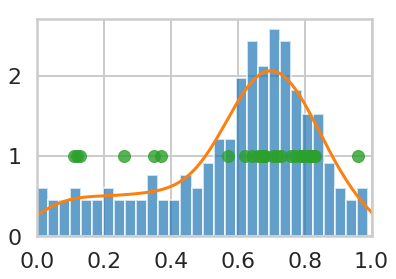

In [13]:
plt.hist(x, normed = True, bins = 30, alpha = 0.7)
sns.kdeplot(x)
plt.plot(x[indexes], [1.0]*len(indexes), 'o', alpha = 0.8)
plt.xlim([0, 1])

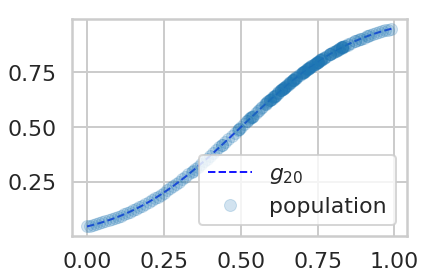

In [14]:
plt.plot(x, g20(x), 'b--', alpha = 0.9, lw = 2, label = "$g_{20}$")
plt.plot(x, f, 'o', alpha = 0.2, label = "population")
plt.legend(loc = 4)

## Stochastic Noise

In [0]:
sigma = 0.06
mask = (x > 0.65) & (x < 0.8)
sigmalist = sigma + mask * 0.03

In [0]:
y = f + sp.stats.norm.rvs(scale = sigmalist, size = 200)
yadd = (y < 0.0) * (0.01 - y)
ysub = (y > 1.0) * (y - 1.0)
y = y + yadd - ysub

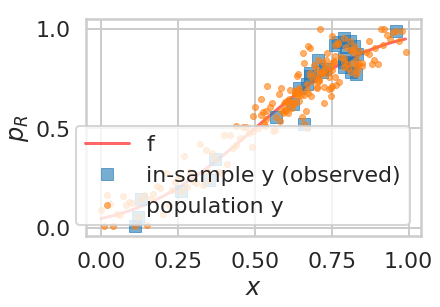

In [17]:
plt.plot(x, f, 'r-', alpha = 0.6, label = "f")
plt.plot(x[indexes], y[indexes], 's', alpha = 0.6, label = "in-sample y (observed)")
plt.plot(x, y, '.', alpha = 0.6, label = "population y")
plt.xlabel("$x$")
plt.ylabel("$p_R$")
plt.legend(loc = 4)

In [18]:
g1noisy = np.poly1d(np.polyfit(x[indexes], y[indexes], 1))
g20noisy = np.poly1d(np.polyfit(x[indexes], y[indexes], 20))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  


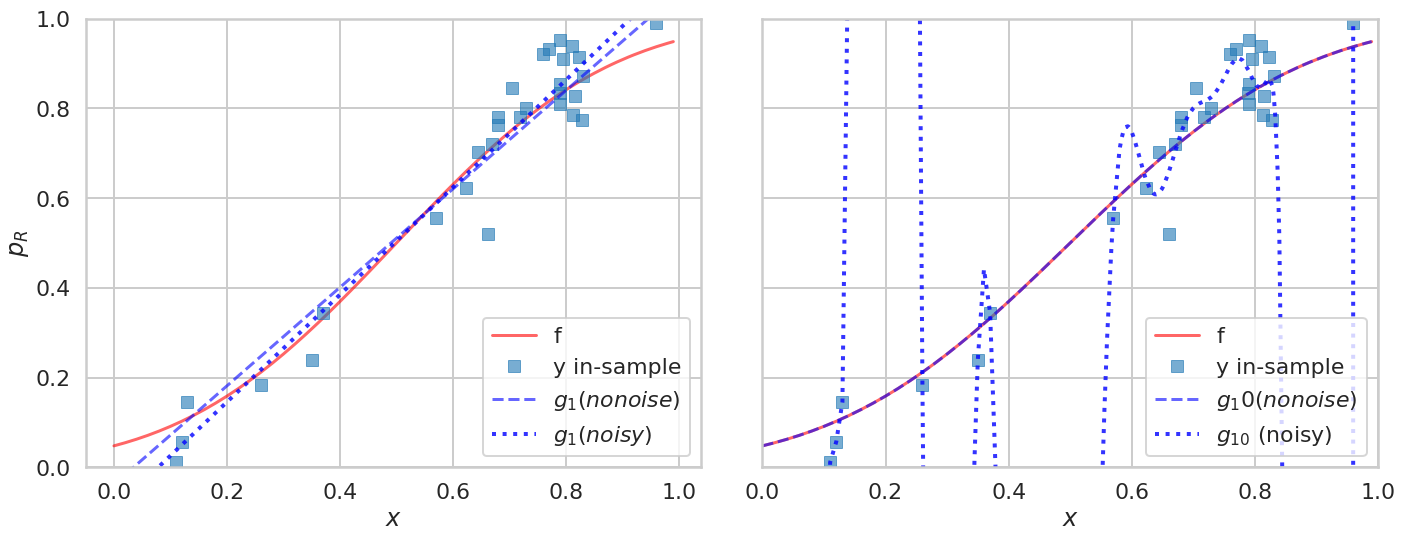

In [19]:
axes=make_plot()
axes[0].plot(x,f, 'r-', alpha=0.6, label="f")
axes[1].plot(x,f, 'r-', alpha=0.6, label="f")
axes[0].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample")
axes[1].plot(x[indexes],y[indexes], 's', alpha=0.6, label="y in-sample")
axes[0].plot(x,g1(x),  'b--', alpha=0.6, label="$g_1 (no noise)$")
axes[0].plot(x,g1noisy(x), 'b:', lw=4, alpha=0.8, label="$g_1 (noisy)$")
axes[1].plot(x,g20(x),  'b--', alpha=0.6, label="$g_10 (no noise)$")
axes[1].plot(x,g20noisy(x), 'b:', lw=4, alpha=0.8, label="$g_{10}$ (noisy)")
axes[0].legend(loc=4)
axes[1].legend(loc=4)

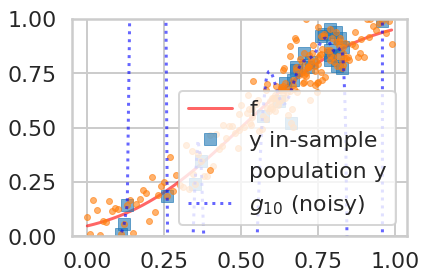

In [20]:
plt.plot(x, f, 'r-', alpha = 0.6, label = "f")
plt.plot(x[indexes], y[indexes], 's', alpha = 0.6, label = "y in-sample")
plt.plot(x, y, '.', alpha = 0.6, label = "population y")
plt.plot(x, g20noisy(x), 'b:', alpha = 0.6, label = "$g_{10}$ (noisy)")
plt.ylim([0, 1])
plt.legend(loc = 4)

Text(0.5,1,'Noisy Data')

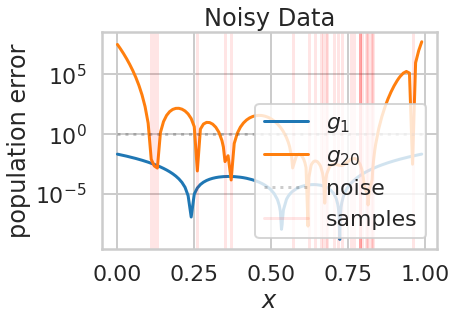

In [21]:
plt.plot(x, ((g1noisy(x) - f)**2), lw = 3, label = "$g_1$")
plt.plot(x, ((g20noisy(x) - f)**2), lw = 3, label = "$g_{20}$")
plt.plot(x, [1]*x.shape[0], "k:", label = "noise", alpha = 0.2)

for i in indexes[:-1]:
  plt.axvline(x[i], 0, 1, color = 'r', alpha = 0.1)

plt.axvline(x[indexes[-1]], 0, 1, color = 'r', alpha = 0.1, label = "samples")
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc = 4)

plt.title("Noisy Data")

# Variance of the Model

In [0]:
def gen(degree, nsims, size, x, out):
  outpoly = []
  for i in range(nsims):
    indexes = np.sort(np.random.choice(x.shape[0], size = size, replace = False))
    pc = np.polyfit(x[indexes], out[indexes], degree)
    p = np.poly1d(pc)
    outpoly.append(p)
    
  return outpoly

In [23]:
polys1 = gen(1, 200, 30, x, y)
polys20 = gen(20, 200, 30, x, y)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: 

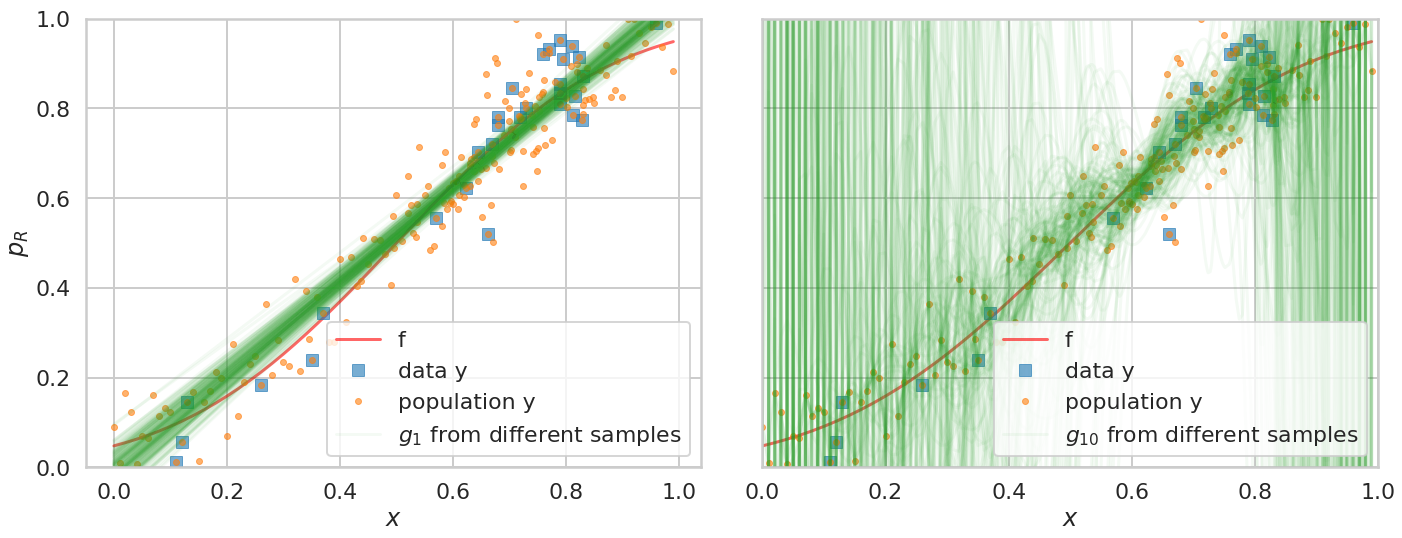

In [24]:
axes=make_plot()
axes[0].plot(x,f, 'r-', lw=3, alpha=0.6, label="f")
axes[1].plot(x,f, 'r-', lw=3, alpha=0.6, label="f")
axes[0].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y")
axes[1].plot(x[indexes], y[indexes], 's', alpha=0.6, label="data y")
axes[0].plot(x, y, '.', alpha=0.6, label="population y")
axes[1].plot(x, y, '.', alpha=0.6, label="population y")
c=sns.color_palette()[2]
for i,p in enumerate(polys1[:-1]):
    axes[0].plot(x,p(x), alpha=0.05, c=c)
axes[0].plot(x,polys1[-1](x), alpha=0.05, c=c,label="$g_1$ from different samples")
for i,p in enumerate(polys20[:-1]):
    axes[1].plot(x,p(x), alpha=0.05, c=c)
axes[1].plot(x,polys20[-1](x), alpha=0.05, c=c, label="$g_{10}$ from different samples")
axes[0].legend(loc=4)
axes[1].legend(loc=4)

(-1000000000000.0, 1000000000000.0)

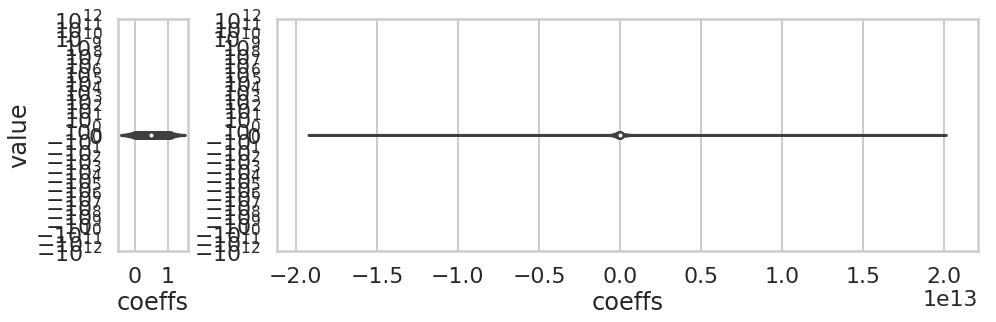

In [25]:
pdict1={}
pdict20={}
for i in reversed(range(2)):
    pdict1[i]=[]
    for j, p in enumerate(polys1):
        pdict1[i].append(p.c[i])
for i in reversed(range(21)):
    pdict20[i]=[]
    for j, p in enumerate(polys20):
        pdict20[i].append(p.c[i]) 
df1=pd.DataFrame(pdict1)
df20=pd.DataFrame(pdict20)
fig = plt.figure(figsize=(14, 5)) 
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 10]) 
axes = [plt.subplot(gs[0]), plt.subplot(gs[1])]
axes[0].set_ylabel("value")
axes[0].set_xlabel("coeffs")
axes[1].set_xlabel("coeffs")
plt.tight_layout()
sns.violinplot(df1, ax=axes[0])
sns.violinplot(df20, ax=axes[1])
axes[0].set_yscale("symlog")
axes[1].set_yscale("symlog")
axes[0].set_ylim([-1e12, 1e12])
axes[1].set_ylim([-1e12, 1e12])

In [0]:
df=pd.DataFrame(dict(x=x[indexes],f=f[indexes],y=y[indexes]))

In [0]:
from sklearn.model_selection import train_test_split
datasize=df.shape[0]
#split dataset using the index, as we have x,f, and y that we want to split.
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

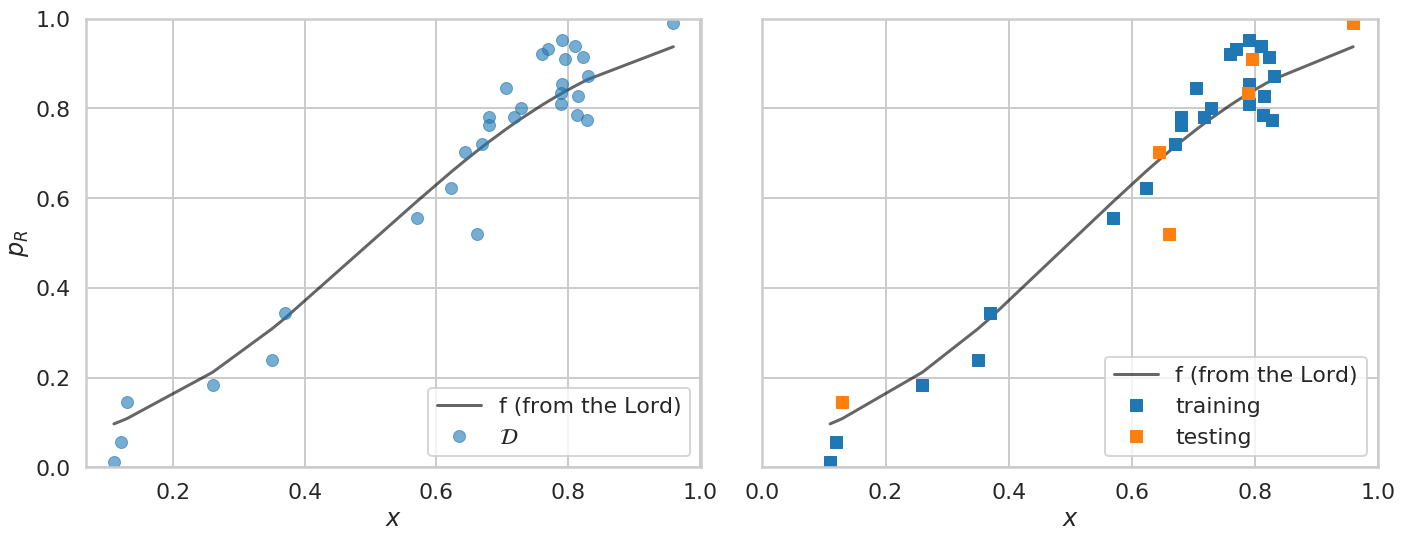

In [28]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

In [29]:
from sklearn.preprocessing import PolynomialFeatures
PolynomialFeatures(3).fit_transform([[1],[2], [3]])

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [30]:
np.array([1,2,3]).reshape(-1,1)

array([[1],
       [2],
       [3]])

In [31]:
xtrain

array([0.83090377, 0.82850909, 0.790102  , 0.79      , 0.26      ,
       0.11      , 0.57      , 0.7902686 , 0.7290476 , 0.76      ,
       0.12      , 0.81523718, 0.37      , 0.76990666, 0.35      ,
       0.70533267, 0.62271266, 0.82327336, 0.81      , 0.68      ,
       0.71829603, 0.68028873, 0.81318007, 0.66984294])

In [32]:
xtrain.reshape(-1,1)

array([[0.83090377],
       [0.82850909],
       [0.790102  ],
       [0.79      ],
       [0.26      ],
       [0.11      ],
       [0.57      ],
       [0.7902686 ],
       [0.7290476 ],
       [0.76      ],
       [0.12      ],
       [0.81523718],
       [0.37      ],
       [0.76990666],
       [0.35      ],
       [0.70533267],
       [0.62271266],
       [0.82327336],
       [0.81      ],
       [0.68      ],
       [0.71829603],
       [0.68028873],
       [0.81318007],
       [0.66984294]])

In [33]:
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))

array([[1.        , 0.83090377, 0.69040107],
       [1.        , 0.82850909, 0.68642731],
       [1.        , 0.790102  , 0.62426117],
       [1.        , 0.79      , 0.6241    ],
       [1.        , 0.26      , 0.0676    ],
       [1.        , 0.11      , 0.0121    ],
       [1.        , 0.57      , 0.3249    ],
       [1.        , 0.7902686 , 0.62452446],
       [1.        , 0.7290476 , 0.53151041],
       [1.        , 0.76      , 0.5776    ],
       [1.        , 0.12      , 0.0144    ],
       [1.        , 0.81523718, 0.66461166],
       [1.        , 0.37      , 0.1369    ],
       [1.        , 0.76990666, 0.59275627],
       [1.        , 0.35      , 0.1225    ],
       [1.        , 0.70533267, 0.49749418],
       [1.        , 0.62271266, 0.38777106],
       [1.        , 0.82327336, 0.67777903],
       [1.        , 0.81      , 0.6561    ],
       [1.        , 0.68      , 0.4624    ],
       [1.        , 0.71829603, 0.51594919],
       [1.        , 0.68028873, 0.46279276],
       [1.

In [0]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

In [36]:
traintestlists[3]['train'], ytrain

(array([[1.        , 0.83090377, 0.69040107, 0.57365685],
        [1.        , 0.82850909, 0.68642731, 0.56871127],
        [1.        , 0.790102  , 0.62426117, 0.49323   ],
        [1.        , 0.79      , 0.6241    , 0.493039  ],
        [1.        , 0.26      , 0.0676    , 0.017576  ],
        [1.        , 0.11      , 0.0121    , 0.001331  ],
        [1.        , 0.57      , 0.3249    , 0.185193  ],
        [1.        , 0.7902686 , 0.62452446, 0.49354207],
        [1.        , 0.7290476 , 0.53151041, 0.38749639],
        [1.        , 0.76      , 0.5776    , 0.438976  ],
        [1.        , 0.12      , 0.0144    , 0.001728  ],
        [1.        , 0.81523718, 0.66461166, 0.54181614],
        [1.        , 0.37      , 0.1369    , 0.050653  ],
        [1.        , 0.76990666, 0.59275627, 0.456367  ],
        [1.        , 0.35      , 0.1225    , 0.042875  ],
        [1.        , 0.70533267, 0.49749418, 0.3508989 ],
        [1.        , 0.62271266, 0.38777106, 0.24146995],
        [1.   

In [37]:
traintestlists[3]['test'], ytest

(array([[1.        , 0.66111803, 0.43707705, 0.28895952],
        [1.        , 0.78965524, 0.62355539, 0.49239378],
        [1.        , 0.13      , 0.0169    , 0.002197  ],
        [1.        , 0.79526318, 0.63244352, 0.50295905],
        [1.        , 0.96      , 0.9216    , 0.884736  ],
        [1.        , 0.64396137, 0.41468625, 0.26704193]]),
 array([0.51958176, 0.83429982, 0.14586736, 0.90981423, 0.99111705,
        0.70322003]))

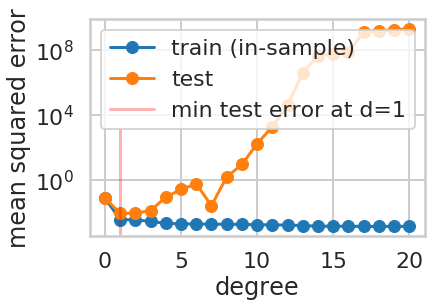

In [38]:
for d in degrees:#for increasing polynomial degrees 0,1,2...
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    #set up model
    est = LinearRegression()
    #fit
    est.fit(Xtrain, ytrain)
    #predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    #calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")

3


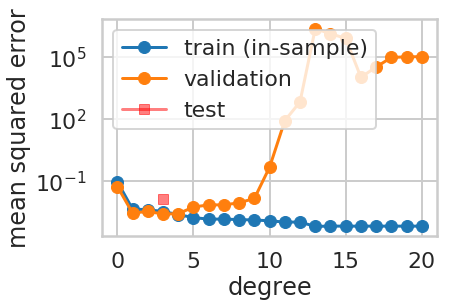

In [39]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the new smaller training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

#calculate the degree at which validation error is minimized
mindeg = np.argmin(error_valid) 
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
#predict on the test set now and calculate error
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print(mindeg)

6


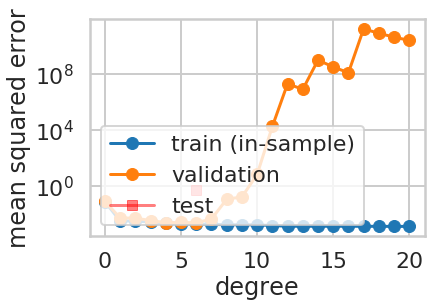

In [40]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print(mindeg)

# Cross Validation

In [0]:
from sklearn.model_selection import KFold
n_folds=4
degrees=range(21)
results=[]
fold = KFold(n_folds,shuffle=False)
for d in degrees:
    hypothesisresults=[]
    for train, test in fold.split(xtrain): # split data into train/test groups, 4 times
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test']))) # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults))) # average

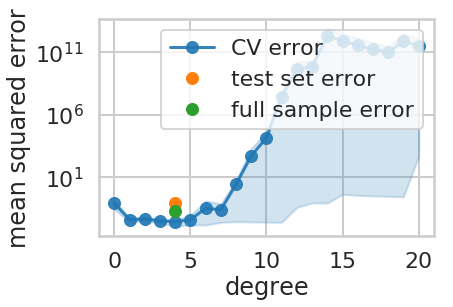

In [42]:
mindeg = np.argmin([r[0] for r in results])
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err
c0=sns.color_palette()[0]
#plt.errorbar(degrees, [r[0] for r in results], yerr=[r[1] for r in results], marker='o', label='CV error', alpha=0.5)
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)
plt.fill_between(degrees, [r[1] for r in results], [r[2] for r in results], color=c0, alpha=0.2)
plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')


plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')
plt.yscale("log")

# Regularization

(100, 3)


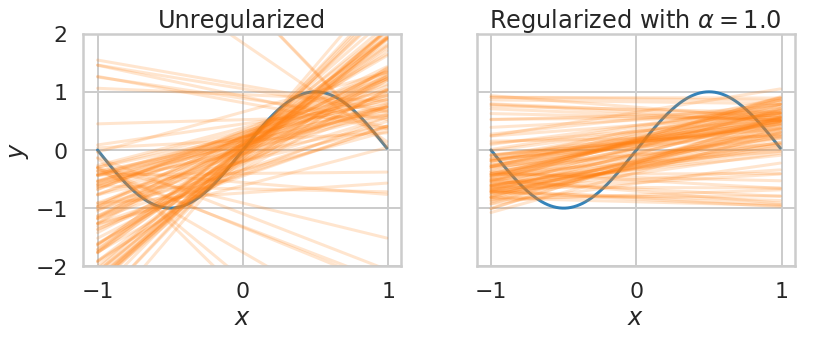

In [43]:
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
print(D.shape)
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");

# **Regularization of the Romney model with Cross-Validation**

In [0]:
def plot_functions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

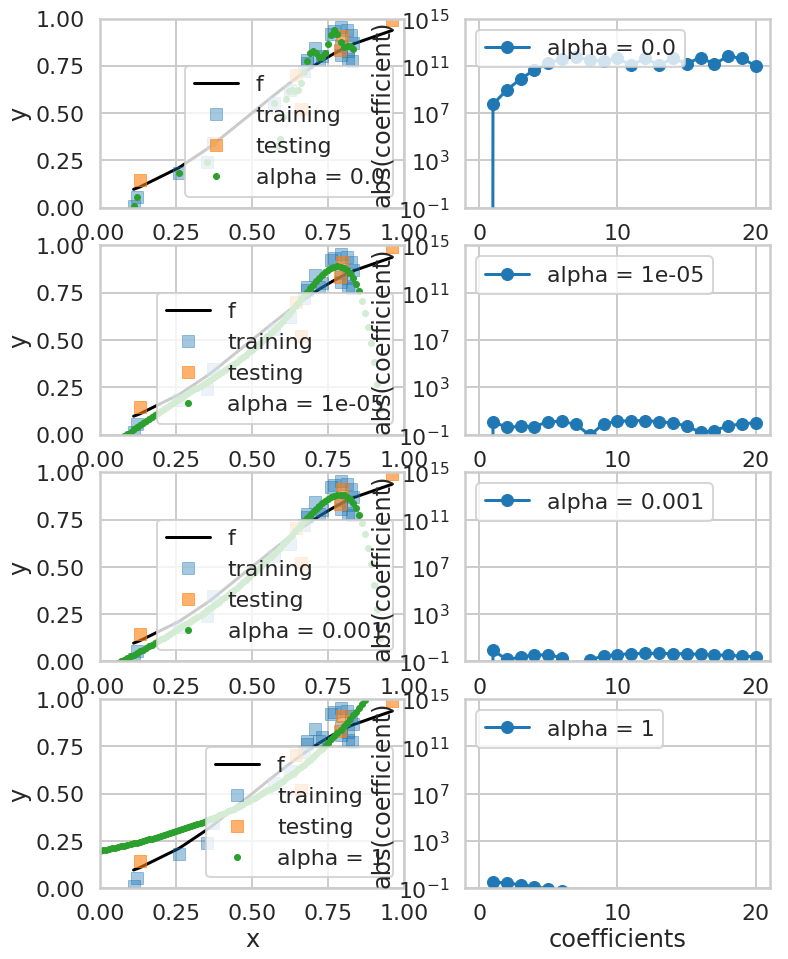

In [45]:
fig, rows = plt.subplots(4, 2, figsize=(12, 16))
d=20
alphas = [0.0, 1e-5, 1e-3, 1]
Xtrain = traintestlists[d]['train']
Xtest = traintestlists[d]['test']
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plot_functions(est, l, df, alpha, xtest, Xtest, xtrain, ytrain)
    plot_coefficients(est, r, alpha)

In [0]:
from sklearn.metrics import make_scorer
#, 1e-6, 1e-5, 1e-3, 1.0
from sklearn.model_selection import learning_curve, GridSearchCV
def cv_optimize_ridge(X, y, n_folds=4):
    clf = Ridge()
    parameters = {"alpha": [1e-8, 1e-6, 1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0]}
    #the scoring parameter below is the default one in ridge, but you can use a different one
    #in the cross-validation phase if you want.
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring="completeness_score")
    gs.fit(X, y)
    return gs

In [0]:
fitmodel = cv_optimize_ridge(Xtrain, ytrain, n_folds=4)

In [60]:
fitmodel.best_estimator_, fitmodel.best_params_, fitmodel.best_score_, fitmodel.cv_results_

(Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 {'alpha': 1e-08},
 1.0,
 {'mean_fit_time': array([0.00068599, 0.00062257, 0.00065225, 0.00063229, 0.00066388,
         0.00062972, 0.00064701, 0.00063699, 0.00059474, 0.00070173]),
  'mean_score_time': array([0.00417471, 0.00114644, 0.00118083, 0.00116271, 0.00116134,
         0.00117904, 0.00118774, 0.00115705, 0.00117576, 0.00117654]),
  'mean_test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'mean_train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
  'param_alpha': masked_array(data=[1e-08, 1e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001,
                     0.01, 0.1, 1.0],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'alpha': 1e-08},
   {'alpha': 1e-06},
   {'alpha': 1e-05},
   {'alpha': 5e-05

In [50]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [0]:
alphawechoose = fitmodel.best_params_['alpha']
clf = Ridge(alpha=alphawechoose).fit(Xtrain,ytrain)

In [0]:
err=mean_squared_error(clf.predict(Xtest), ytest)
errtr=mean_squared_error(clf.predict(Xtrain), ytrain)
errout=0.8*errtr+0.2*err

In [0]:
def plot_functions_onall(est, ax, df, alpha, xtrain, ytrain, Xtrain, xtest, ytest):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', alpha=0.4, label="train")
    ax.plot(xtest, ytest, 's', alpha=0.6, label="test")
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX), '.', alpha=0.6, label="alpha = %s" % str(alpha))
    #print est.predict(transX)
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')

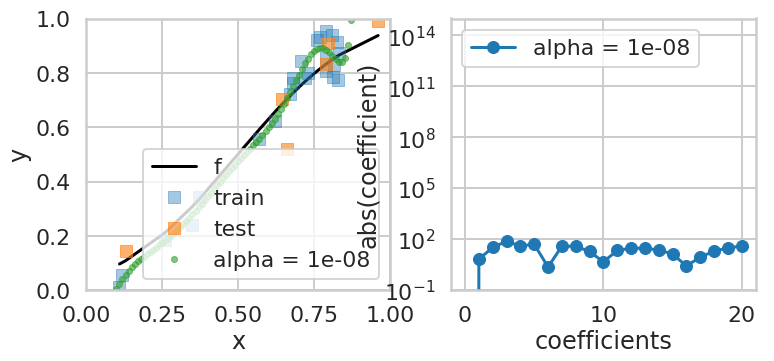

In [64]:
fig, rows = plt.subplots(1, 2, figsize=(12, 5))
l,r=rows
plot_functions_onall(clf, l, df, alphawechoose, xtrain, ytrain, Xtrain, xtest, ytest)
plot_coefficients(clf, r, alphawechoose)